In [25]:
from selenium import webdriver
driver = webdriver.Chrome('chromedriver.exe')

In [26]:
import time

# 인스타그램 접속하기
driver.get('https://www.instargram.com')

#로딩하는데 시간이 걸릴 수 있으므로 3초간 대기
time.sleep(3)

In [27]:
# 인스타계정으로 로그인
insta_id = 'yurimm_2_2'   
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]

password = 'dbflasla9106@' 
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]

input_id.send_keys(insta_id)
input_pw.send_keys(password)

first = driver.find_element_by_css_selector("#loginForm > div.Igw0E.IwRSH.eGOV_._4EzTm.kEKum > div:nth-child(3)")
first.click()

In [63]:
def searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [64]:
word = '어린이날선물🎁'
url = searching(word)
driver.get(url)

In [65]:
def click_first(driver):
    first = driver.find_element_by_css_selector('#react-root > section > main > article > div:nth-child(3) > div > div:nth-child(1) > div:nth-child(1) > a > div.eLAPa > div._9AhH0')
    first.click()
    time.sleep(3)
click_first(driver)

In [66]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['#리그램 - @lovely_hyorin by @get_regrammer⠀#누리나래멋진 놀이를 공유해주셔서 감사합니다❤⠀⠀#어린이집#어린이날선물🎁..아침에 담임선생님께서 선물 주신다고 집앞에 나오라해서씻지도 못하고😱 거지꼴로🤣 얼른 나가서 받아온 선물☺️효린이는👧 예쁜선생님👩\u200d🏫 만난다고 설레서 뛰어나가고🤭..원에 한번도 못가보고 이렇게 짧게짧게 집앞에서만세번 만난거 실화?ㅋㅋㅋㅋㅋ🤪효린이는 진짜 5년째 한번도 #등원🎒 이란걸 못해봣네😢.예쁜선생님👩\u200d🏫도 만나고 싶고 친구들도👭 만나고 싶고노란색라니어린이집버스가🚌 너무나 타고 싶은 효린이👧..곧 효린이 소원이 이루어질거야🌈 그럴거야 분명🤗..챙겨주신 과자.선물.책.교구#누리나래.학습지.마스크.감사합니당🙏가족사진도 이쁘게 만들어 주셔서 감사해용 선생님👍.칸쵸과자는 뽀로로비타민으로 줄을 만들어 붙여 만든 가방인데가방끈 떨어짐🤣ㅋㅋ벌써 먹어버림🙊.인증샷📸 찍어 보내달라셔서 찍는데 우리 구름이🐶까지❤구름이도 개린이니깐용😍😍😍#아이와강아지는사랑입니다 💕👧🐶...#효린이는#좋겠네#매일매일#선물🎁#한가득#내일까지#너의날💕#너하고싶은거다해❣️#나도#어린이#하고싶다#부럽다#우리딸👧#오늘도#효린이는#핑크공주🎀#집에서도#핑크핑크해🌸#rillafamily#릴라#왕리본핀#프린세스빅보우',
 '2021-01-12',
 '18',
 '',
 ['#리그램',
  '#누리나래멋진',
  '#어린이집',
  '#어린이날선물🎁..아침에',
  '#등원🎒',
  '#누리나래.학습지.마스크.감사합니당🙏가족사진도',
  '#아이와강아지는사랑입니다',
  '#효린이는',
  '#좋겠네',
  '#매일매일',
  '#선물🎁',
  '#한가득',
  '#내일까지',
  '#너의날💕',
  '#너하고싶은거다해❣️',
  '#나도',
  '#어린이',
  '#하고싶다',
  '#부럽다',
  '#우리딸👧',
  '#오늘도',
  '#효린이는',
  '#핑크공주🎀',
  '#집에서도',
  '#핑크핑크해🌸',
  '#rillafamily',

In [67]:
def next_page(driver):
    next_page = driver.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow')
    next_page.click()
    time.sleep(3)
next_page(driver)

In [70]:
word = "어린이날선물🎁"    #검색어
url = searching(word)

# 검색페이지 접속
driver.get(url)
time.sleep(3)

# 첫 번째 게시글 열기
click_first(driver)

#크롤링 결과를담을 리스트 생성
result = [ ]


# 여러 게시글 수집하기
target = 500      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)

In [ ]:
import pandas as pd
result = pd.DataFrame(result)
result

In [72]:
result.to_excel('data_3.xlsx')

In [1]:
import pandas as pd
df1=pd.read_excel('data_1.xlsx',sheet_name='Sheet1')
df1

,Unnamed: 0,0,1,2,3,4
0,0,⠀⠀아이가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 ...,2021-01-13,5,NaN,"['#리틀디', '#little_d', '#my_artist', '#마이아티스트',..."
1,1,"타지점에서 몇천씩 손실보신 실제 회원분들 이미 HB플렉스직영점으로 가입후,수익보고계...",2021-01-13,NaN,NaN,"['#fx시티', '#투자', '#초기부업', '#목돈만들기', '#아리빗', '#..."
2,2,주문해 주셔서 고맙습니다🌳-#hannamoo🌳#아이디...,2021-01-13,8,NaN,"['#hannamoo🌳', '#아이디어스', '#캘리그라피', ..."
3,3,귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘...,2021-01-12,6,NaN,"['#스마일슬리퍼', '#리그램이벤트중', '#육아', '#육아템', '#연년생',..."
4,4,"최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...",2021-01-12,NaN,NaN,"['#허브파이넥스', '#허브파이넥스플렉스점', '#코리아트레이딩', '#WBM',..."
...,...,...,...,...,...,...
486,486,"최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...",2020-12-25,2,NaN,"['#허브파이넥스플렉스점', '#허브파이넥스카카오점', '#허브파이넥스부산점', '..."
487,487,#크리스마스선물#김치선물#어린이날선물두두등장!! 태백김치 개봉했어요~!!아이들을 위...,2020-12-25,131,NaN,"['#크리스마스선물', '#김치선물', '#어린이날선물두두등장!!', '#하나님딸'..."
488,488,.타지점에서 몇천씩 손실보신 실제 회원분들 이미 허브파이넥스플렉스직영점으로 사전가입...,2020-12-25,1,NaN,"['#허브파이넥스', '#리딩', '#마진거래', '#비트코인', '#FX시티불법'..."
489,489,#광고⠀⠀⠀⠀⠀⠀❝보니앤코 2way 미니백_Black❞⠀⠀⠀ᄏ...,2020-12-25,214,NaN,"['#광고⠀⠀⠀⠀⠀⠀❝보니앤코', '#보니앤코', '#5사..."


In [2]:
df2=pd.read_excel('data_2.xlsx',sheet_name='Sheet1')
df2

,Unnamed: 0,0,1,2,3,4
0,0,베베드피노 제주점입니다.#베베드피노제주점 ..봄신상 오픈이 하루 남았네요🌱..베베드...,2021-01-13,2,NaN,"['#베베드피노제주점', '#🎶영업시간:AM11:00~PM20:30💕택배가능합니다~..."
1,1,동화속에서 나올듯한러블리한 회전목마ᄋ...,2021-01-13,7,NaN,"['#회전목마', '#회전목마오르골', '#회전ᄆ..."
2,2,#협찬 #연세키즈텐엄마들 사이에선 워낙 ...,2021-01-13,437,NaN,"['#협찬', '#연세키즈텐엄마들', '#연세키..."
3,3,".세상 편한 칫솔 살균기 탄생!칫솔을 툭 넣어주기만 하면칫솔도, 양치컵도 동시에 9...",2021-01-13,0,NaN,"['#아이곁에언제나', '#쪼비마켓', '#육아는..."
4,4,#Repost @bongbong_friends• • • • • •생일이면 모두 모이...,2021-01-13,1,NaN,"['#Repost', '#성분안심화장품', '#봉봉프랜즈', '#어린이화장품', '..."
...,...,...,...,...,...,...
485,485,🌈 베이비드로잉s 의 영단어 스티커 작업입니다^^ 아이만의 ᄀ...,2021-01-04,9,NaN,"['#이름표스티커', '#artstagram', '#drawing', ..."
486,486,🌈 베이비추상화#abstractart 베이비드로잉s 아이만의...,2021-01-04,9,NaN,"['#abstractart', '#artstagram', '#drawing', '#..."
487,487,#유자매네첫줄 #1.20...Posted @withregram • @greatboo...,2021-01-04,4,NaN,"['#유자매네첫줄', '#1.20...Posted', '#그레이트북스', '#그북'..."
488,488,˚✧₊ 손민수 팔찌 레이어드 조합 착용샷 ₊✧˚ 위에...,2021-01-04,10,NaN,[]


In [3]:
df3=pd.read_excel('data_3.xlsx',sheet_name='Sheet1')
df3

,Unnamed: 0,0,1,2,3,4
0,0,#리그램 - @lovely_hyorin by @get_regrammer⠀#누리나래멋...,2021-01-12,18.0,NaN,"['#리그램', '#누리나래멋진', '#어린이집', '#어린이날선물🎁..아침에', ..."
1,1,#애착인형 #인형놀이 #몽키 포즈 보소...🙈...,2021-01-08,19.0,NaN,"['#애착인형', '#인형놀이', '#몽키', '#ᄋ..."
2,2,#인형놀이 #애착인형젤리캣 영국 Wumper 타이거 호랑이 31cm,2021-01-08,14.0,NaN,"['#인형놀이', '#애착인형젤리캣']"
3,3,#애착인형 #인형놀이젤리캣 영국 Merry...,2021-01-07,27.0,NaN,"['#애착인형', '#인형놀이젤리캣', '#육..."
4,4,#인형놀이 #애착인형 🐳🐶젤리캣 영국 he...,2021-01-07,19.0,NaN,"['#인형놀이', '#애착인형', '#육아템', ..."
...,...,...,...,...,...,...
488,488,우리희성이가 첨으로 접해본 어린이날 행사여서 너무너무 행복하고 좋았어~😄즐겁고 잼있...,2020-05-08,14.0,NaN,"['#아이러브', '#어린이날행사🎈', '#어린이날선물🎁', '#14개월아기👶🏻']"
489,489,걸어다닐꺼면 신발을신지ㅋㅋㅋ얼렁연습해서 엄마랑타자#딸기할미선물🎁 #어린이날선물🎁 #...,2020-05-08,0.0,NaN,"['#딸기할미선물🎁', '#어린이날선물🎁', '#할미', '#물총사주세요']"
490,490,#어린이날선물🎁 #오이삼촌그램 #오이는외삼촌#외숙모#겁나이뻐💕 #이쁘게신자👟 #이제...,2020-05-08,19.0,NaN,"['#어린이날선물🎁', '#오이삼촌그램', '#오이는외삼촌', '#외숙모', '#겁..."
491,491,#왕밤이네일상🌰 #생후944일째#꿀복이480일째🐽 리니가 예전부터 갖고 싶어 했던 ...,2020-05-08,66.0,Dangjin,"['#왕밤이네일상🌰', '#생후944일째', '#꿀복이480일째🐽', '#왕밤이🌰'..."


In [4]:
df=pd.DataFrame([])
df.append(df1)

,Unnamed: 0,0,1,2,3,4
0,0,⠀⠀아이가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 ...,2021-01-13,5,NaN,"['#리틀디', '#little_d', '#my_artist', '#마이아티스트',..."
1,1,"타지점에서 몇천씩 손실보신 실제 회원분들 이미 HB플렉스직영점으로 가입후,수익보고계...",2021-01-13,NaN,NaN,"['#fx시티', '#투자', '#초기부업', '#목돈만들기', '#아리빗', '#..."
2,2,주문해 주셔서 고맙습니다🌳-#hannamoo🌳#아이디...,2021-01-13,8,NaN,"['#hannamoo🌳', '#아이디어스', '#캘리그라피', ..."
3,3,귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘...,2021-01-12,6,NaN,"['#스마일슬리퍼', '#리그램이벤트중', '#육아', '#육아템', '#연년생',..."
4,4,"최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...",2021-01-12,NaN,NaN,"['#허브파이넥스', '#허브파이넥스플렉스점', '#코리아트레이딩', '#WBM',..."
...,...,...,...,...,...,...
486,486,"최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...",2020-12-25,2,NaN,"['#허브파이넥스플렉스점', '#허브파이넥스카카오점', '#허브파이넥스부산점', '..."
487,487,#크리스마스선물#김치선물#어린이날선물두두등장!! 태백김치 개봉했어요~!!아이들을 위...,2020-12-25,131,NaN,"['#크리스마스선물', '#김치선물', '#어린이날선물두두등장!!', '#하나님딸'..."
488,488,.타지점에서 몇천씩 손실보신 실제 회원분들 이미 허브파이넥스플렉스직영점으로 사전가입...,2020-12-25,1,NaN,"['#허브파이넥스', '#리딩', '#마진거래', '#비트코인', '#FX시티불법'..."
489,489,#광고⠀⠀⠀⠀⠀⠀❝보니앤코 2way 미니백_Black❞⠀⠀⠀ᄏ...,2020-12-25,214,NaN,"['#광고⠀⠀⠀⠀⠀⠀❝보니앤코', '#보니앤코', '#5사..."


In [5]:
df.append(df2)

,Unnamed: 0,0,1,2,3,4
0,0,베베드피노 제주점입니다.#베베드피노제주점 ..봄신상 오픈이 하루 남았네요🌱..베베드...,2021-01-13,2,NaN,"['#베베드피노제주점', '#🎶영업시간:AM11:00~PM20:30💕택배가능합니다~..."
1,1,동화속에서 나올듯한러블리한 회전목마ᄋ...,2021-01-13,7,NaN,"['#회전목마', '#회전목마오르골', '#회전ᄆ..."
2,2,#협찬 #연세키즈텐엄마들 사이에선 워낙 ...,2021-01-13,437,NaN,"['#협찬', '#연세키즈텐엄마들', '#연세키..."
3,3,".세상 편한 칫솔 살균기 탄생!칫솔을 툭 넣어주기만 하면칫솔도, 양치컵도 동시에 9...",2021-01-13,0,NaN,"['#아이곁에언제나', '#쪼비마켓', '#육아는..."
4,4,#Repost @bongbong_friends• • • • • •생일이면 모두 모이...,2021-01-13,1,NaN,"['#Repost', '#성분안심화장품', '#봉봉프랜즈', '#어린이화장품', '..."
...,...,...,...,...,...,...
485,485,🌈 베이비드로잉s 의 영단어 스티커 작업입니다^^ 아이만의 ᄀ...,2021-01-04,9,NaN,"['#이름표스티커', '#artstagram', '#drawing', ..."
486,486,🌈 베이비추상화#abstractart 베이비드로잉s 아이만의...,2021-01-04,9,NaN,"['#abstractart', '#artstagram', '#drawing', '#..."
487,487,#유자매네첫줄 #1.20...Posted @withregram • @greatboo...,2021-01-04,4,NaN,"['#유자매네첫줄', '#1.20...Posted', '#그레이트북스', '#그북'..."
488,488,˚✧₊ 손민수 팔찌 레이어드 조합 착용샷 ₊✧˚ 위에...,2021-01-04,10,NaN,[]


In [6]:
result1=df1.append(df2)
result1

,Unnamed: 0,0,1,2,3,4
0,0,⠀⠀아이가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 ...,2021-01-13,5,NaN,"['#리틀디', '#little_d', '#my_artist', '#마이아티스트',..."
1,1,"타지점에서 몇천씩 손실보신 실제 회원분들 이미 HB플렉스직영점으로 가입후,수익보고계...",2021-01-13,NaN,NaN,"['#fx시티', '#투자', '#초기부업', '#목돈만들기', '#아리빗', '#..."
2,2,주문해 주셔서 고맙습니다🌳-#hannamoo🌳#아이디...,2021-01-13,8,NaN,"['#hannamoo🌳', '#아이디어스', '#캘리그라피', ..."
3,3,귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘...,2021-01-12,6,NaN,"['#스마일슬리퍼', '#리그램이벤트중', '#육아', '#육아템', '#연년생',..."
4,4,"최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...",2021-01-12,NaN,NaN,"['#허브파이넥스', '#허브파이넥스플렉스점', '#코리아트레이딩', '#WBM',..."
...,...,...,...,...,...,...
485,485,🌈 베이비드로잉s 의 영단어 스티커 작업입니다^^ 아이만의 ᄀ...,2021-01-04,9,NaN,"['#이름표스티커', '#artstagram', '#drawing', ..."
486,486,🌈 베이비추상화#abstractart 베이비드로잉s 아이만의...,2021-01-04,9,NaN,"['#abstractart', '#artstagram', '#drawing', '#..."
487,487,#유자매네첫줄 #1.20...Posted @withregram • @greatboo...,2021-01-04,4,NaN,"['#유자매네첫줄', '#1.20...Posted', '#그레이트북스', '#그북'..."
488,488,˚✧₊ 손민수 팔찌 레이어드 조합 착용샷 ₊✧˚ 위에...,2021-01-04,10,NaN,[]


In [7]:
result2=result1.append(df3)

In [8]:
result2

,Unnamed: 0,0,1,2,3,4
0,0,⠀⠀아이가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 ...,2021-01-13,5,NaN,"['#리틀디', '#little_d', '#my_artist', '#마이아티스트',..."
1,1,"타지점에서 몇천씩 손실보신 실제 회원분들 이미 HB플렉스직영점으로 가입후,수익보고계...",2021-01-13,NaN,NaN,"['#fx시티', '#투자', '#초기부업', '#목돈만들기', '#아리빗', '#..."
2,2,주문해 주셔서 고맙습니다🌳-#hannamoo🌳#아이디...,2021-01-13,8,NaN,"['#hannamoo🌳', '#아이디어스', '#캘리그라피', ..."
3,3,귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘...,2021-01-12,6,NaN,"['#스마일슬리퍼', '#리그램이벤트중', '#육아', '#육아템', '#연년생',..."
4,4,"최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...",2021-01-12,NaN,NaN,"['#허브파이넥스', '#허브파이넥스플렉스점', '#코리아트레이딩', '#WBM',..."
...,...,...,...,...,...,...
488,488,우리희성이가 첨으로 접해본 어린이날 행사여서 너무너무 행복하고 좋았어~😄즐겁고 잼있...,2020-05-08,14,NaN,"['#아이러브', '#어린이날행사🎈', '#어린이날선물🎁', '#14개월아기👶🏻']"
489,489,걸어다닐꺼면 신발을신지ㅋㅋㅋ얼렁연습해서 엄마랑타자#딸기할미선물🎁 #어린이날선물🎁 #...,2020-05-08,0,NaN,"['#딸기할미선물🎁', '#어린이날선물🎁', '#할미', '#물총사주세요']"
490,490,#어린이날선물🎁 #오이삼촌그램 #오이는외삼촌#외숙모#겁나이뻐💕 #이쁘게신자👟 #이제...,2020-05-08,19,NaN,"['#어린이날선물🎁', '#오이삼촌그램', '#오이는외삼촌', '#외숙모', '#겁..."
491,491,#왕밤이네일상🌰 #생후944일째#꿀복이480일째🐽 리니가 예전부터 갖고 싶어 했던 ...,2020-05-08,66,Dangjin,"['#왕밤이네일상🌰', '#생후944일째', '#꿀복이480일째🐽', '#왕밤이🌰'..."


In [9]:
result2.drop_duplicates([0])

,Unnamed: 0,0,1,2,3,4
0,0,⠀⠀아이가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 ...,2021-01-13,5,NaN,"['#리틀디', '#little_d', '#my_artist', '#마이아티스트',..."
1,1,"타지점에서 몇천씩 손실보신 실제 회원분들 이미 HB플렉스직영점으로 가입후,수익보고계...",2021-01-13,NaN,NaN,"['#fx시티', '#투자', '#초기부업', '#목돈만들기', '#아리빗', '#..."
2,2,주문해 주셔서 고맙습니다🌳-#hannamoo🌳#아이디...,2021-01-13,8,NaN,"['#hannamoo🌳', '#아이디어스', '#캘리그라피', ..."
3,3,귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘...,2021-01-12,6,NaN,"['#스마일슬리퍼', '#리그램이벤트중', '#육아', '#육아템', '#연년생',..."
4,4,"최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...",2021-01-12,NaN,NaN,"['#허브파이넥스', '#허브파이넥스플렉스점', '#코리아트레이딩', '#WBM',..."
...,...,...,...,...,...,...
488,488,우리희성이가 첨으로 접해본 어린이날 행사여서 너무너무 행복하고 좋았어~😄즐겁고 잼있...,2020-05-08,14,NaN,"['#아이러브', '#어린이날행사🎈', '#어린이날선물🎁', '#14개월아기👶🏻']"
489,489,걸어다닐꺼면 신발을신지ㅋㅋㅋ얼렁연습해서 엄마랑타자#딸기할미선물🎁 #어린이날선물🎁 #...,2020-05-08,0,NaN,"['#딸기할미선물🎁', '#어린이날선물🎁', '#할미', '#물총사주세요']"
490,490,#어린이날선물🎁 #오이삼촌그램 #오이는외삼촌#외숙모#겁나이뻐💕 #이쁘게신자👟 #이제...,2020-05-08,19,NaN,"['#어린이날선물🎁', '#오이삼촌그램', '#오이는외삼촌', '#외숙모', '#겁..."
491,491,#왕밤이네일상🌰 #생후944일째#꿀복이480일째🐽 리니가 예전부터 갖고 싶어 했던 ...,2020-05-08,66,Dangjin,"['#왕밤이네일상🌰', '#생후944일째', '#꿀복이480일째🐽', '#왕밤이🌰'..."


In [10]:
result2.to_csv("dup_data2.csv")

In [11]:
result2[0]

0      ⠀⠀아이가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 ...
1      타지점에서 몇천씩 손실보신 실제 회원분들 이미 HB플렉스직영점으로 가입후,수익보고계...
2      주문해 주셔서 고맙습니다🌳-#hannamoo🌳#아이디...
3      귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘...
4      최소로 최대를만드는 방법💟 초보.경력자의미없는소액재태크💟 친구추천시, 1.5% 수수...
                             ...                        
488    우리희성이가 첨으로 접해본 어린이날 행사여서 너무너무 행복하고 좋았어~😄즐겁고 잼있...
489    걸어다닐꺼면 신발을신지ㅋㅋㅋ얼렁연습해서 엄마랑타자#딸기할미선물🎁 #어린이날선물🎁 #...
490    #어린이날선물🎁 #오이삼촌그램 #오이는외삼촌#외숙모#겁나이뻐💕 #이쁘게신자👟 #이제...
491    #왕밤이네일상🌰 #생후944일째#꿀복이480일째🐽 리니가 예전부터 갖고 싶어 했던 ...
492    어린이날저녁 아빠퇴근해서 은섭이띠하고집앞토이플러스로고고 재난기금쿠폰으로해결하자고 갔...
Name: 0, Length: 1474, dtype: object

In [12]:
list_1=result2[0].values.tolist()

In [13]:
list_1

['⠀⠀아이가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 다 보이죠😘😘신기한 마법❤️⠀⠀..⠀𝐥𝐢𝐭𝐭𝐥𝐞.𝐝 𝐛𝐚𝐛𝐲 𝐣𝐞𝐰𝐞𝐥𝐫𝐲⠀#리틀디 #little_d #my_artist #마이아티스트#첫그림목걸이 #드로잉목걸이 #미아방지목걸이',
 '타지점에서 몇천씩 손실보신 실제 회원분들 이미 HB플렉스직영점으로 가입후,수익보고계세요.이유는 하나!!지점을 운영하며 그동안 쌓은 신뢰와 제일중요한 높은 수익률때문이겠죠?.인생역쩐은 지금부터 허브파이넥스 플렉스점에서시작하세요.실시간리딩으로 수익실현 도와드립니다 ~~#fx시티#투자#초기부업#목돈만들기#아리빗#소액투자#워킹맘투잡#직장인투잡#마진거래#주식투자#직장인알바#허브파이넥스#허브파이넥스플렉스점 ♫꒰･‿･๑꒱😶😶#주부알바 #인친소통 #출근 #데이트스타그램 #부업왕 #부업성공비밀 #뉴카인드프라이스 #부업이미지 #부업초보 #마진거래 #30대직장인부업 #어린이날선물 #부업아이템 #극초기부업',
 '주문해 주셔서 고맙습니다🌳-#hannamoo🌳#아이디어스#캘리그라피#캘리#캘리봉투#캘리액자#캘리엽서#용돈봉투#미니꽃다발#선물#선물추천#어버이날선물#어린이날선물#스승의날선물#추석선물#설날선물#주문제작#이벤트#여자친구선물#남자친구선물#취직선물#졸업선물#핸드메이드#말씀액자#말씀엽서#말씀캘리',
 '귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘#딸맘#아들맘#육아스타그램#육아소통#황금개띠#황금돼지띠#황금개띠맘#황금돼지띠맘#빌리브몽#구디백#구디백전문#답례품#유치원선물#생일선물#초딩선물#입학선물#어린이날선물#화이트데이#발렌타인데이#어린이집답례품#생일답례품

In [14]:
#처음엔 설치 필요!
!pip install wordcloud
from wordcloud import WordCloud
import konlpy
import numpy as np
import pandas as pd
import re, os
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
%matplotlib inline

In [15]:
    
no_meaning = "어린이날선물|어린이날|아이|계정|팔로우|당첨|발표|선물|어린이"
no_meaning += "맘스타그램|참여완료|새해"
my_text_clean = []
for a_line in list_1:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()>~.,]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('[a-zA-Z]',' ',a_line)       # 영문 스페이스로 대체.
    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    
    my_text_clean += [a_line]

In [16]:
my_text_clean[:10]

['⠀⠀ 가 처음 그린 그림은엄마에겐 너무나 소중한 보물이죠💕⠀어떤 형태도엄마 눈엔 다 보이죠😘😘신기한 마법❤️⠀⠀ ⠀𝐥𝐢𝐭𝐭𝐥𝐞 𝐝 𝐛𝐚𝐛𝐲 𝐣𝐞𝐰𝐞𝐥𝐫𝐲⠀#리틀디 # _ # _ #마이아티스트#첫그림목걸이 #드로잉목걸이 #미아방지목걸이',
 '타지점에서 몇천씩 손실보신 실제 회원분들 이미 플렉스직영점으로 가입후 수익보고계세요 이유는 하나 지점을 운영하며 그동안 쌓은 신뢰와 제일중요한 높은 수익률때문이겠죠 인생역쩐은 지금부터 허브파이넥스 플렉스점에서시작하세요 실시간리딩으로 수익실현 도와드립니다 # 시티#투자#초기부업#목돈만들기#아리빗#소액투자#워킹맘투잡#직장인투잡#마진거래#주식투자#직장인알바#허브파이넥스#허브파이넥스플렉스점 ♫꒰･‿･ ꒱😶😶#주부알바 #인친소통 #출근 #데이트스타그램 #부업왕 #부업성공비밀 #뉴카인드프라이스 #부업이미지 #부업초보 #마진거래 # 대직장인부업 # #부업 템 #극초기부업',
 '주문해 주셔서 고맙습니다🌳 # 🌳#아이디어스#캘리그라피#캘리#캘리봉투#캘리액자#캘리엽서#용돈봉투#미니꽃다발#선물#선물추천#어버이날선물#어린이날선물#스승의날선물#추석선물#설날선물#주문제작#이벤트#여자친구선물#남자친구선물#취직선물#졸업선물#핸드메이드#말씀액자#말씀엽서#말씀캘리',
 '귀요미 스마일 슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘#딸맘#아들맘#육아스타그램#육아소통#황금개띠#황금돼지띠#황금개띠맘#황금돼지띠맘#빌리브몽#구디백#구디백전문#답례품#유치원 #생일 #초딩 #입학 # #화이트데이#발렌타인데이#어린이집답례품#생일답례품#디즈니#디즈니덕후#미니미키마우스가방',
 '최소로 최대를만드는 방법💟 초보 경력자

In [19]:
hannanum = konlpy.tag.Hannanum()

In [20]:
# 명사 추출.
my_words = []
for a_line in my_text_clean:
    my_words += hannanum.nouns(a_line)

In [21]:
my_words

['⠀⠀',
 '그림은엄마에겐',
 '소중',
 '보물이죠💕⠀어떤',
 '형태도엄마',
 '눈',
 '보이죠😘😘신기한',
 '마법❤️⠀⠀',
 '⠀𝐥𝐢𝐭𝐭𝐥𝐞',
 '𝐝',
 '𝐛𝐚𝐛𝐲',
 '𝐣𝐞𝐰𝐞𝐥𝐫𝐲⠀#리틀디',
 '#',
 '_',
 '#',
 '_',
 '#마이아티스트#첫그림목걸',
 '#드로잉목걸',
 '#미아방지목걸',
 '타지점',
 '몇천',
 '손실보',
 '실제',
 '회원분',
 '플렉스직영점',
 '가입후',
 '수익보고계',
 '이유',
 '하나',
 '지점',
 '운영',
 '그동안',
 '신뢰',
 '제일중요',
 '수익률때문이겠죠',
 '인생역쩐',
 '허브파이넥스',
 '플렉스점에서시작하세요',
 '실시간리딩',
 '수익실현',
 '#',
 '시티#투자#초기부업#목돈만들기#아리빗#소액투자#워킹맘투잡#직장인투잡#마진거래#주식투자#직장인알바#허브파이넥스#허브파이넥스플렉스점',
 '♫꒰･‿･',
 '꒱😶😶#주부알바',
 '#인친소통',
 '#출근',
 '#데이트스타그램',
 '#부업왕',
 '#부업성공비밀',
 '#뉴카인드프라이스',
 '#부업이미지',
 '#부업초보',
 '#마진거래',
 '#',
 '대직장인부업',
 '#',
 '#부업',
 '템',
 '#극초기부업',
 '귀요미',
 '스마',
 '슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘#딸맘#아들맘#육아스타그램#육아소통#황금개띠#황금돼지띠#황금개띠맘#황금돼지띠맘#빌리브몽#구디백#구디백전문#답례품#유치원',
 '#생',
 '#초딩',
 '#입학',
 '#',
 '#화이트데이#발렌타인데이#어린이집답례품#생일답례품#디즈니#디즈니덕후#미니미키마우스가방',
 '최소',
 '최대를만드',
 '방법💟',
 '초보',
 '경력자의미없는소액재태크💟',
 '친구추천시',
 '수수료공유💟',
 '거래시',
 '차트',
 '초봉분석💟',
 '거래마강시간',
 '초',
 '가능💟',
 '만원',
 '상당',
 '회원홍보',
 '지원#허브파이넥스#허브파이넥스플렉스점#코리아

In [22]:
# 단음절 제거.
my_words_2 = []
for a_word in my_words:
    if len(a_word) > 1:
        my_words_2 += [a_word]

In [23]:
my_words

['⠀⠀',
 '그림은엄마에겐',
 '소중',
 '보물이죠💕⠀어떤',
 '형태도엄마',
 '눈',
 '보이죠😘😘신기한',
 '마법❤️⠀⠀',
 '⠀𝐥𝐢𝐭𝐭𝐥𝐞',
 '𝐝',
 '𝐛𝐚𝐛𝐲',
 '𝐣𝐞𝐰𝐞𝐥𝐫𝐲⠀#리틀디',
 '#',
 '_',
 '#',
 '_',
 '#마이아티스트#첫그림목걸',
 '#드로잉목걸',
 '#미아방지목걸',
 '타지점',
 '몇천',
 '손실보',
 '실제',
 '회원분',
 '플렉스직영점',
 '가입후',
 '수익보고계',
 '이유',
 '하나',
 '지점',
 '운영',
 '그동안',
 '신뢰',
 '제일중요',
 '수익률때문이겠죠',
 '인생역쩐',
 '허브파이넥스',
 '플렉스점에서시작하세요',
 '실시간리딩',
 '수익실현',
 '#',
 '시티#투자#초기부업#목돈만들기#아리빗#소액투자#워킹맘투잡#직장인투잡#마진거래#주식투자#직장인알바#허브파이넥스#허브파이넥스플렉스점',
 '♫꒰･‿･',
 '꒱😶😶#주부알바',
 '#인친소통',
 '#출근',
 '#데이트스타그램',
 '#부업왕',
 '#부업성공비밀',
 '#뉴카인드프라이스',
 '#부업이미지',
 '#부업초보',
 '#마진거래',
 '#',
 '대직장인부업',
 '#',
 '#부업',
 '템',
 '#극초기부업',
 '귀요미',
 '스마',
 '슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘#딸맘#아들맘#육아스타그램#육아소통#황금개띠#황금돼지띠#황금개띠맘#황금돼지띠맘#빌리브몽#구디백#구디백전문#답례품#유치원',
 '#생',
 '#초딩',
 '#입학',
 '#',
 '#화이트데이#발렌타인데이#어린이집답례품#생일답례품#디즈니#디즈니덕후#미니미키마우스가방',
 '최소',
 '최대를만드',
 '방법💟',
 '초보',
 '경력자의미없는소액재태크💟',
 '친구추천시',
 '수수료공유💟',
 '거래시',
 '차트',
 '초봉분석💟',
 '거래마강시간',
 '초',
 '가능💟',
 '만원',
 '상당',
 '회원홍보',
 '지원#허브파이넥스#허브파이넥스플렉스점#코리아

In [24]:
my_words_2

['⠀⠀',
 '그림은엄마에겐',
 '소중',
 '보물이죠💕⠀어떤',
 '형태도엄마',
 '보이죠😘😘신기한',
 '마법❤️⠀⠀',
 '⠀𝐥𝐢𝐭𝐭𝐥𝐞',
 '𝐛𝐚𝐛𝐲',
 '𝐣𝐞𝐰𝐞𝐥𝐫𝐲⠀#리틀디',
 '#마이아티스트#첫그림목걸',
 '#드로잉목걸',
 '#미아방지목걸',
 '타지점',
 '몇천',
 '손실보',
 '실제',
 '회원분',
 '플렉스직영점',
 '가입후',
 '수익보고계',
 '이유',
 '하나',
 '지점',
 '운영',
 '그동안',
 '신뢰',
 '제일중요',
 '수익률때문이겠죠',
 '인생역쩐',
 '허브파이넥스',
 '플렉스점에서시작하세요',
 '실시간리딩',
 '수익실현',
 '시티#투자#초기부업#목돈만들기#아리빗#소액투자#워킹맘투잡#직장인투잡#마진거래#주식투자#직장인알바#허브파이넥스#허브파이넥스플렉스점',
 '♫꒰･‿･',
 '꒱😶😶#주부알바',
 '#인친소통',
 '#출근',
 '#데이트스타그램',
 '#부업왕',
 '#부업성공비밀',
 '#뉴카인드프라이스',
 '#부업이미지',
 '#부업초보',
 '#마진거래',
 '대직장인부업',
 '#부업',
 '#극초기부업',
 '귀요미',
 '스마',
 '슬리퍼봄준비♡#스마일슬리퍼#리그램이벤트중#육아#육아템#연년생#연년생맘#딸맘#아들맘#육아스타그램#육아소통#황금개띠#황금돼지띠#황금개띠맘#황금돼지띠맘#빌리브몽#구디백#구디백전문#답례품#유치원',
 '#생',
 '#초딩',
 '#입학',
 '#화이트데이#발렌타인데이#어린이집답례품#생일답례품#디즈니#디즈니덕후#미니미키마우스가방',
 '최소',
 '최대를만드',
 '방법💟',
 '초보',
 '경력자의미없는소액재태크💟',
 '친구추천시',
 '수수료공유💟',
 '거래시',
 '차트',
 '초봉분석💟',
 '거래마강시간',
 '가능💟',
 '만원',
 '상당',
 '회원홍보',
 '지원#허브파이넥스#허브파이넥스플렉스점#코리아트레이딩#',
 '#비트오리진#맥스옵션#키움증권#트리플스톡#에그빗',
 'ﾉ◕ヮ◕',
 'ﾉ*:・ﾟ✧😎😃#일산맘',
 '#투잡',

In [25]:
my_series = pd.Series(my_words_2)

In [26]:
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:50]

#어린         323
그레이트북스      213
이벤트         199
건강          177
특별          155
가능          145
⠀◆          142
⁣⁣⁣⁣⁣       128
게시물         126
⠀⠀⠀⠀⠀       112
참여          111
댓글          110
리그램         103
#육아맘        100
공식           98
우리           98
#생           95
주문           94
사용           93
아메리카노        92
#맘스타그램       92
기간           90
케이크          88
#육아스타그램      88
#입학          86
제품           86
장난감          84
친구           80
추천           79
완료           78
준비한          78
하나           78
#이벤트         77
추첨           73
링크           73
습관           73
칭찬           73
신세계          72
#안녕마음아       72
계획           72
소환           72
상품권          72
식습관          72
#놀라운자연       71
#내친구과학공룡     71
#집콕독서        71
#도서추천        71
스타벅스         71
가지기✔         71
위한여러분만       71
dtype: int64

In [27]:
a_long_sentence = ','.join(my_words_2)


In [28]:
wc = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
wc.words_

{'어린 어린': 1.0,
 '맘스타그램 육아맘': 0.9866666666666667,
 '참여 완료': 0.96,
 '그레이트북스 어서오소': 0.9466666666666667,
 '어서오소 그레이트북스': 0.9466666666666667,
 '그레이트북스 왔소': 0.9466666666666667,
 '왔소 드디': 0.9466666666666667,
 '드디 밝았습니다': 0.9466666666666667,
 '밝았습니다 신년': 0.9466666666666667,
 '신년 그레이트북스': 0.9466666666666667,
 '그레이트북스 준비한': 0.9466666666666667,
 '준비한 특별': 0.9466666666666667,
 '특별 이벤트': 0.9466666666666667,
 '이벤트 다짐을댓글': 0.9466666666666667,
 '다짐을댓글 추첨': 0.9466666666666667,
 '추첨 드려요': 0.9466666666666667,
 '드려요 건강': 0.9466666666666667,
 '건강 식습관': 0.9466666666666667,
 '식습관 만들기': 0.9466666666666667,
 '만들기 하루': 0.9466666666666667,
 '하루 칭찬': 0.9466666666666667,
 '칭찬 가지기': 0.9466666666666667,
 '가지기 그레이트북스': 0.9466666666666667,
 '그레이트북스 습관': 0.9466666666666667,
 '습관 다지기': 0.9466666666666667,
 '다지기 행복하': 0.9466666666666667,
 '행복하 건강': 0.9466666666666667,
 '건강 위한여러분만': 0.9466666666666667,
 '위한여러분만 특별': 0.9466666666666667,
 '특별 계획': 0.9466666666666667}

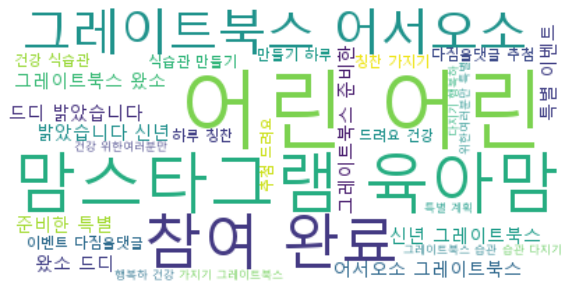

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

In [30]:
df_chart=pd.DataFrame(my_word_counts)

In [31]:
df_result=df_chart.head(10)

In [32]:
df_result

,0
#어린,323
그레이트북스,213
이벤트,199
건강,177
특별,155
가능,145
⠀◆,142
⁣⁣⁣⁣⁣,128
게시물,126
⠀⠀⠀⠀⠀,112


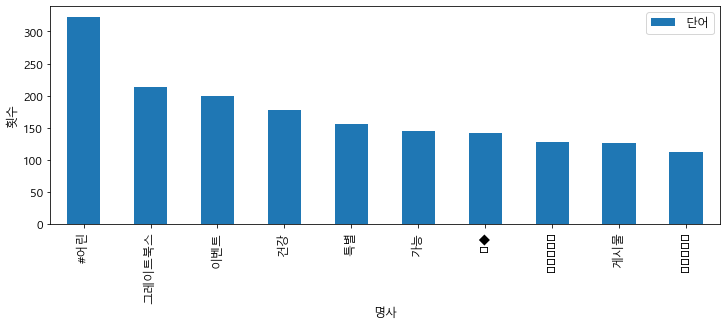

In [35]:
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
 
    # Windows 한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = df_result.plot(kind='bar', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('명사', fontsize=12)          # x축 정보 표시
ax.set_ylabel('횟수', fontsize=12)     # y축 정보 표시
ax.legend(['단어', '횟수'], fontsize=12)    # 범례 지정